# RESULTS CPI FORECASTING

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### Read File 

In [3]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
data.head()


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2003-01-01,102.0,101.6,102.1,100.1,96.6,105.5,108.4,100.5,99.3,106.8,101.5,101.5,108.3,101.9,102.1
2003-02-01,102.8,101.5,102.5,100.6,98.7,107.1,116.1,100.8,100.6,108.1,102.1,102.0,113.0,103.0,102.6
2003-03-01,103.1,101.7,103.2,100.6,100.3,107.6,117.2,100.5,100.3,108.3,102.3,102.2,115.3,103.6,102.7
2003-04-01,102.4,101.8,102.3,100.7,98.7,105.4,106.7,101.2,100.0,108.9,102.3,102.2,106.0,101.9,102.9
2003-05-01,102.5,102.1,102.9,100.6,98.3,104.0,99.3,101.4,100.7,110.2,102.5,102.4,103.7,101.8,103.2


#### Get Basic summary stastistics and information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2003-01-01 to 2023-04-01
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All-items                             244 non-null    float64
 1   Food                                  244 non-null    float64
 2   Shelter                               244 non-null    float64
 3   Household operations                  244 non-null    float64
 4   Clothing and footwear                 244 non-null    float64
 5   Transportation                        244 non-null    float64
 6   Gasoline                              244 non-null    float64
 7   Health and personal care              244 non-null    float64
 8   Recreation & education                244 non-null    float64
 9   Alcohol, tobacco & cannabis           244 non-null    float64
 10  All-items excluding food and energy   244 non-null    float64
 11  

In [5]:
data.columns

Index(['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services '],
      dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All-items,244.0,123.229508,13.362860,102.0,112.175,122.70,133.000,156.4
Food,244.0,132.002459,20.085299,100.7,112.600,131.80,144.700,183.1
Shelter,244.0,129.881148,16.165007,102.1,119.500,127.95,140.075,169.9
Household operations,244.0,114.036885,9.665732,100.1,104.000,114.05,122.725,133.7
Clothing and footwear,244.0,94.535246,2.662912,87.9,92.775,94.65,96.225,100.8
Transportation,244.0,128.072541,15.869033,103.7,116.700,127.35,137.125,176.2
Gasoline,244.0,161.768852,33.503064,99.3,142.525,157.40,183.350,299.4
Health and personal care,244.0,117.973361,10.583401,100.5,107.900,118.40,125.600,145.7
Recreation & education,244.0,108.413115,7.160660,99.1,102.075,106.40,114.500,127.1
"Alcohol, tobacco & cannabis",244.0,144.764754,21.909026,106.8,126.600,139.60,166.475,189.4


In [7]:
#checking for missing values
data.isnull().sum()

All-items                               0
Food                                    0
Shelter                                 0
Household operations                    0
Clothing and footwear                   0
Transportation                          0
Gasoline                                0
Health and personal care                0
Recreation & education                  0
Alcohol, tobacco & cannabis             0
All-items excluding food and energy     0
All-items excluding energy              0
Energy                                  0
Goods                                   0
Services                                0
dtype: int64

In [8]:
data= data[['All-items']]
data.head()

,All-items
Date,
2003-01-01,102.0
2003-02-01,102.8
2003-03-01,103.1
2003-04-01,102.4
2003-05-01,102.5


# PROPOSED MODEL 

### RNN Encoder Decoder Single Head Attention Model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Embedding, Flatten, Activation, Concatenate, Dot
from tensorflow.keras.models import Model

# Assuming "data" is your DataFrame with all the columns

# Prepare data for only "All-items" column
all_items_data = data[['All-items']]

# Define the train-test split
train_data = all_items_data[:-4]
test_data = all_items_data[-7:]

# Define the model architecture
# Define the model architecture

encoder_inputs = Input(shape=(None, 1))
encoder_lstm = LSTM(180, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(180, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Attention mechanism
attention = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context, decoder_outputs])

output = TimeDistributed(Dense(1, activation='linear'))(decoder_combined_context)

model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='mse')

# Train the model with teacher forcing
encoder_input_train = train_data.values[:-1, :, np.newaxis]
decoder_input_train = train_data.values[1:, :, np.newaxis]
decoder_output_train = train_data.values[1:, :, np.newaxis]

model.fit(
    [encoder_input_train, decoder_input_train],
    decoder_output_train,
    epochs=500,
    batch_size=4
)

# Evaluate the model on the test set
encoder_input_test = test_data.values[:-1, :, np.newaxis]
decoder_input_test = test_data.values[1:, :, np.newaxis]
decoder_output_test = test_data.values[1:, :, np.newaxis]

preds = model.predict([encoder_input_test, decoder_input_test])
predictions = preds.squeeze()
test_values = decoder_output_test.squeeze()

mae = mean_absolute_error(test_values, predictions)
smape = 100 * np.mean(2 * np.abs(predictions - test_values) / (np.abs(predictions) + np.abs(test_values)))
rmse = np.sqrt(mean_squared_error(test_values, predictions))
r2 = r2_score(test_values, predictions)

print("MAE:", mae)
print("SMAPE:", smape)
print("RMSE:", rmse)
print("R2 Score:", r2)



Epoch 1/500
60/60 [==============================] - 2s 3ms/step - loss: 13394.1260
Epoch 2/500
60/60 [==============================] - 0s 3ms/step - loss: 8575.2100
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 5200.4204
Epoch 4/500
60/60 [==============================] - 0s 3ms/step - loss: 3064.1638
Epoch 5/500
60/60 [==============================] - 0s 3ms/step - loss: 1827.9128
Epoch 6/500
60/60 [==============================] - 0s 3ms/step - loss: 1097.8175
Epoch 7/500
60/60 [==============================] - 0s 3ms/step - loss: 658.3563
Epoch 8/500
60/60 [==============================] - 0s 3ms/step - loss: 404.2384
Epoch 9/500
60/60 [==============================] - 0s 3ms/step - loss: 276.2465
Epoch 10/500
60/60 [==============================] - 0s 3ms/step - loss: 213.1771
Epoch 11/500
60/60 [==============================] - 0s 3ms/step - loss: 183.2354
Epoch 12/500
60/60 [==============================] - 0s 3ms/step - loss: 167.9417
Epoch 

60/60 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 102/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 103/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1291
Epoch 104/500
60/60 [==============================] - 0s 3ms/step - loss: 0.3054
Epoch 105/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 106/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 107/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1473
Epoch 108/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 109/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 110/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 111/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1875
Epoch 112/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1522
Epoch 113/500
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 202/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 203/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 204/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0380
Epoch 205/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 206/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 207/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0531
Epoch 208/500
60/60 [==============================] - 0s 4ms/step - loss: 0.1102
Epoch 209/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0874
Epoch 210/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 211/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 212/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1481
Epoch 213/500
60/60 [=========

60/60 [==============================] - 0s 4ms/step - loss: 0.3197
Epoch 302/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1602
Epoch 303/500
60/60 [==============================] - 0s 4ms/step - loss: 0.2716
Epoch 304/500
60/60 [==============================] - 0s 3ms/step - loss: 1.7702
Epoch 305/500
60/60 [==============================] - 0s 3ms/step - loss: 1.1184
Epoch 306/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 307/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 308/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 309/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 310/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 311/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 312/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 313/500
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.1501
Epoch 402/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 403/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1204
Epoch 404/500
60/60 [==============================] - 0s 3ms/step - loss: 0.2206
Epoch 405/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 406/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0525
Epoch 407/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 408/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 409/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 410/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 411/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0974
Epoch 412/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 413/500
60/60 [=========

#### Actual vs Predicted Outputs 

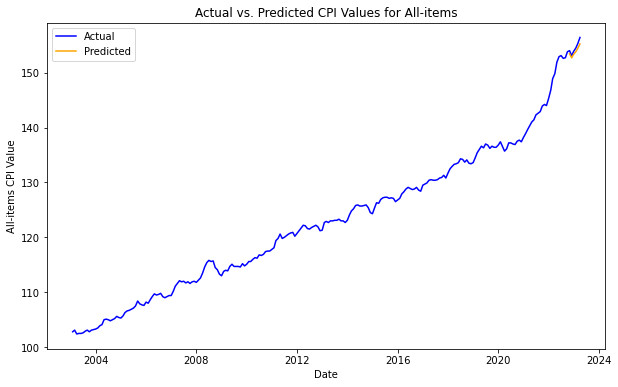

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(all_items_data.index[1:], all_items_data.values[1:], label='Actual', color='blue')
plt.plot(test_data.index[1:], predictions, label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('Actual vs. Predicted CPI Values for All-items')
plt.show()

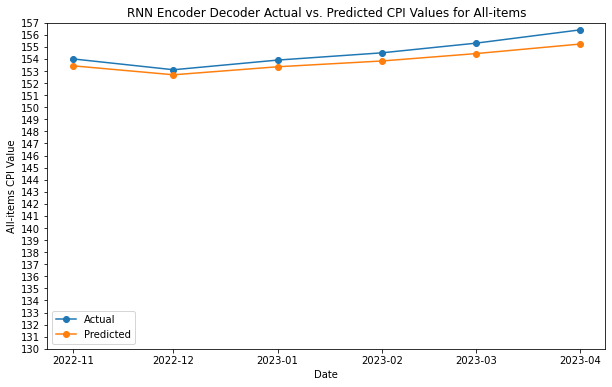

In [11]:
# ... (your existing code above)

# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], test_values, marker ='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions,  marker = 'o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('RNN Encoder Decoder Actual vs. Predicted CPI Values for All-items')

# Set custom y-axis ticks without decimal points
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))

plt.show()


# BASELINE COMPARED MODELS

### Vector Auto Regression Model (VAR)

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


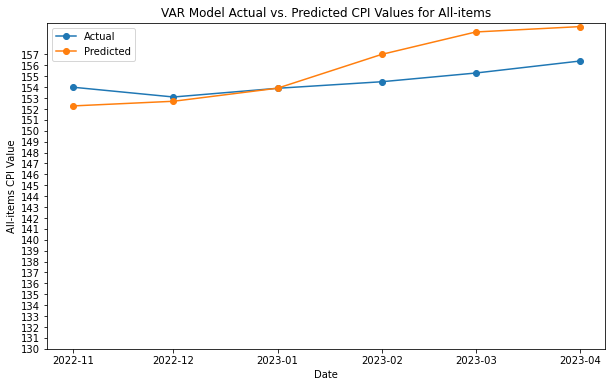

In [12]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 
                  'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
# Preprocessing: Convert columns to numeric and drop missing values
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Update cpi_components list with columns present in the DataFrame
cpi_components = data.columns.tolist()

# Split the data into train and test sets
train_data = data.iloc[:-6]  # Use all but the last 12 months for training
test_data = data.iloc[-6:]  # Use the last 12 months for testing

# Estimate the VAR model
model = VAR(train_data)
lag_order = model.select_order()
selected_order = lag_order.aic  # Extract the selected lag order value based on AIC
var_model = model.fit(selected_order)

# ... (previous code)

# Forecasting for 'All-items' component
component = 'All-items'
n_forecast_periods = len(test_data)  # Number of periods to forecast
forecast = var_model.forecast(var_model.y, steps=n_forecast_periods)

# Extract only the 'All-items' column from the forecast array
forecast_all_items = forecast[:, cpi_components.index(component)]

# Create a DataFrame with the forecasted values for 'All-items' component
forecast_df = pd.DataFrame(forecast_all_items, index=test_data.index, columns=[component])

# Calculate evaluation metrics
r2 = r2_score(test_data[component], forecast_df[component])
mae = mean_absolute_error(test_data[component], forecast_df[component])
smape = 100 * np.mean(2 * abs(test_data[component] - forecast_df[component]) / (abs(test_data[component]) + abs(forecast_df[component])))
rmse = np.sqrt(mean_squared_error(test_data[component], forecast_df[component]))

# Plot the actual versus predicted values for 'All-items' component
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_df[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'VAR Model Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()


### ARIMA Model

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


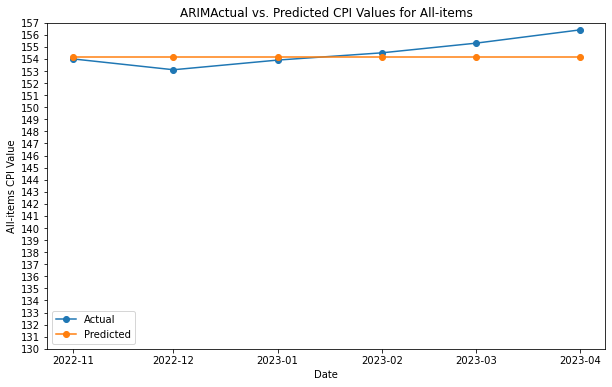

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
data= data[['All-items']]
train_data = data.iloc[:-6]  # Use all but the last 6 months for training
test_data = data.iloc[-6:]  # Use the last 6 months for testing

# Fit the ARIMA model for the 'All-items' component
order = (1, 1, 1)
arima_model = ARIMA(train_data[component], order=order)
arima_model_fit = arima_model.fit()

# Forecasting
forecast = arima_model_fit.forecast(steps=len(test_data))[0]

# Create a DataFrame with the forecasted values for 'All-items' component
forecast_df = pd.DataFrame({component: forecast}, index=test_data.index)

# Evaluate model performance
arima_mae = mean_absolute_error(test_data[component], forecast_df[component])
arima_rmse = np.sqrt(mean_squared_error(test_data[component], forecast_df[component]))
arima_r2 = r2_score(test_data[component], forecast_df[component])

def smape(y_true, y_pred):
    return 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_score = smape(test_data[component], forecast_df[component])

# Plot the actual versus predicted values for 'All-items' component
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_df[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'ARIMActual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()


### Lasso Regressor 

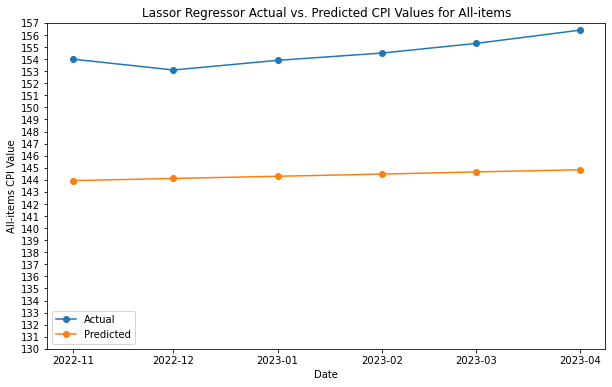

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])

cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 
                  'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
# Preprocessing: Convert columns to numeric and drop missing values
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)



train_data = data.iloc[:-6]  # Use all but the last 12 months for training
test_data = data.iloc[-6:]

# Create a list to hold Lasso regressors
lasso_regressors = []

# Fit Lasso regressors for each component
for component in cpi_components:
    # Prepare the training data for the current component
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values
    
    lasso_model = Lasso(alpha=0.1)  # Adjust alpha value as per your needs
    lasso_model.fit(X_train, y_train)
    lasso_regressors.append((component, lasso_model))

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=lasso_regressors, final_estimator=Lasso())

# Prepare the testing data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

# Create DataFrame to hold the forecast results
forecast_results = pd.DataFrame(index=test_data.index)

# Predict for each component
for component, lasso_model in lasso_regressors:
    # Prepare the testing data for the current component
    X_test_component = X_test
    
    # Forecasting for the current component
    forecast = lasso_model.predict(X_test_component)
    
    # Store the forecast in the DataFrame
    forecast_results[component] = forecast

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the stacking regressor
stacking_regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = stacking_regressor.predict(X_test_scaled)

# Evaluate model performance
lasso_mae = mean_absolute_error(test_data.values, forecast_results.values)
lasso_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_results.values))
lasso_r2 = r2_score(test_data.values, forecast_results.values)



# SMAPE calculation
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(test_data.values, forecast_results.values)
# Plot the actual versus predicted values for 'All-items' column
component = 'All-items'
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_results[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'Lassor Regressor Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()




### Support Vector Regressor 

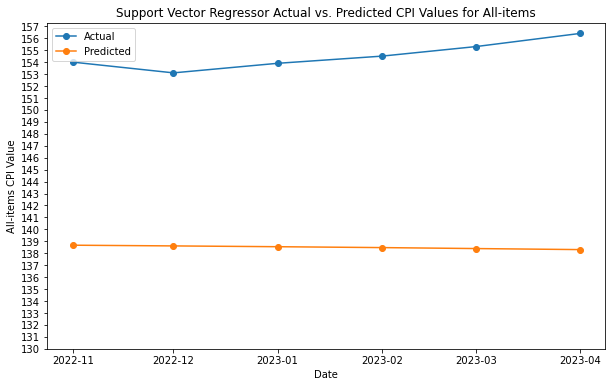

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-6]  # Use all but the last 12 months for training
test_data = data.iloc[-6:]

# Fit SVR models for each component
svr_models = {}  # Dictionary to store the SVR models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component

for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the SVR model
    svr_model = SVR()
    svr_model.fit(X_train, y_train)

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = svr_model.predict(X_test)

    svr_models[component] = svr_model
    forecast_results[component] = forecast

# Combine forecasts from individual SVR models using averaging
ensemble_forecast = np.mean(list(forecast_results.values()), axis=0)

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(ensemble_forecast, index=test_data.index, columns=[cpi_components[0]])

# Evaluate model performance
ensemble_mae = mean_absolute_error(test_data[cpi_components[0]].values, forecast_df.values)
ensemble_rmse = np.sqrt(mean_squared_error(test_data[cpi_components[0]].values, forecast_df.values))

# Calculate overall R2 score
ensemble_r2 = r2_score(test_data[cpi_components[0]].values, forecast_df.values)

# Calculate SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

ensemble_smape = smape(test_data[cpi_components[0]].values, forecast_df.values)

component = 'All-items'
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_results[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'Support Vector Regressor Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()



### Random Forest Regressor 

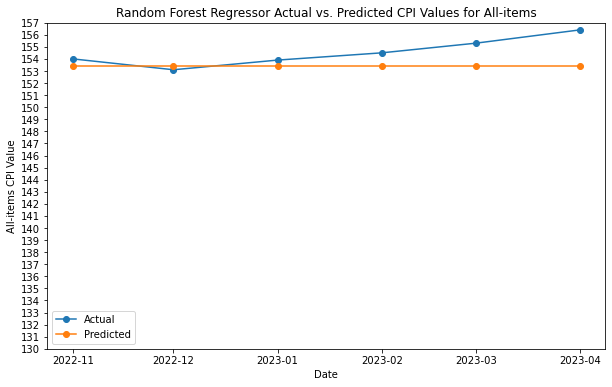

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-6]  # Use all but the last 12 months for training
test_data = data.iloc[-6:]

# Step 3: Fit Random Forest Regressor models for each component
rf_models = {}  # Dictionary to store the Random Forest models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component

smape_scores = []  # List to store SMAPE scores for each component

for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the Random Forest Regressor model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = rf_model.predict(X_train)
    residuals = y_train - train_predictions
    #plot_acf(residuals)
    #plot_pacf(residuals)
    #plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    #plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = rf_model.predict(X_test)

    rf_models[component] = rf_model
    forecast_results[component] = forecast

    # Calculate SMAPE score
    smape = np.mean(2 * np.abs(forecast - test_data[component].values) / (np.abs(forecast) + np.abs(test_data[component].values))) * 100
    smape_scores.append(smape)

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

# Calculate overall R2 score
rf_r2 = r2_score(test_data.values, forecast_df.values)

# Calculate overall SMAPE score
rf_smape = np.mean(smape_scores)

# Step 5: Evaluate model performance
rf_mae = mean_absolute_error(test_data.values, forecast_df.values)
rf_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

component = 'All-items'
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_results[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'Random Forest Regressor Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()



## Artificial Neural Network

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )

# Prepare data for only "All-items" column
all_items_data = data[['All-items']]

# Define the train-test split
train_data = all_items_data[:-6]
test_data = all_items_data[-7:]

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create X and y for training and testing
X_train, y_train = train_data_scaled[:-1], train_data_scaled[1:]
X_test, y_test = test_data_scaled[:-1], test_data_scaled[1:]

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(120, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4)

# Evaluate the model using the test data
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Perform predictions
predictions = model.predict(X_test)

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)

# Convert the index of test_data to datetime format
#test_data.index = pd.to_datetime(test_data.index)




Epoch 1/500
60/60 [==============================] - 0s 894us/step - loss: 0.0260
Epoch 2/500
60/60 [==============================] - 0s 908us/step - loss: 2.5804e-04
Epoch 3/500
60/60 [==============================] - 0s 874us/step - loss: 1.1400e-04
Epoch 4/500
60/60 [==============================] - 0s 820us/step - loss: 1.0878e-04
Epoch 5/500
60/60 [==============================] - 0s 846us/step - loss: 1.0940e-04
Epoch 6/500
60/60 [==============================] - 0s 853us/step - loss: 1.2729e-04
Epoch 7/500
60/60 [==============================] - 0s 819us/step - loss: 1.3196e-04
Epoch 8/500
60/60 [==============================] - 0s 842us/step - loss: 9.4833e-05
Epoch 9/500
60/60 [==============================] - 0s 822us/step - loss: 9.1973e-05
Epoch 10/500
60/60 [==============================] - 0s 815us/step - loss: 1.1655e-04
Epoch 11/500
60/60 [==============================] - 0s 838us/step - loss: 1.0565e-04
Epoch 12/500
60/60 [==============================] - 0s

Epoch 96/500
60/60 [==============================] - 0s 991us/step - loss: 1.0875e-04
Epoch 97/500
60/60 [==============================] - 0s 1ms/step - loss: 1.4630e-04
Epoch 98/500
60/60 [==============================] - 0s 991us/step - loss: 1.0860e-04
Epoch 99/500
60/60 [==============================] - 0s 1ms/step - loss: 1.3247e-04
Epoch 100/500
60/60 [==============================] - 0s 982us/step - loss: 1.1495e-04
Epoch 101/500
60/60 [==============================] - 0s 979us/step - loss: 1.6792e-04
Epoch 102/500
60/60 [==============================] - 0s 941us/step - loss: 1.2285e-04
Epoch 103/500
60/60 [==============================] - 0s 942us/step - loss: 1.2962e-04
Epoch 104/500
60/60 [==============================] - 0s 963us/step - loss: 1.7826e-04
Epoch 105/500
60/60 [==============================] - 0s 898us/step - loss: 1.1297e-04
Epoch 106/500
60/60 [==============================] - 0s 900us/step - loss: 1.0933e-04
Epoch 107/500
60/60 [===================

60/60 [==============================] - 0s 879us/step - loss: 1.2263e-04
Epoch 190/500
60/60 [==============================] - 0s 905us/step - loss: 1.1319e-04
Epoch 191/500
60/60 [==============================] - 0s 820us/step - loss: 1.1964e-04
Epoch 192/500
60/60 [==============================] - 0s 954us/step - loss: 1.6451e-04
Epoch 193/500
60/60 [==============================] - 0s 974us/step - loss: 1.7003e-04
Epoch 194/500
60/60 [==============================] - 0s 991us/step - loss: 1.2133e-04
Epoch 195/500
60/60 [==============================] - 0s 954us/step - loss: 1.1877e-04
Epoch 196/500
60/60 [==============================] - 0s 970us/step - loss: 1.5812e-04
Epoch 197/500
60/60 [==============================] - 0s 863us/step - loss: 1.4092e-04
Epoch 198/500
60/60 [==============================] - 0s 836us/step - loss: 9.7583e-05
Epoch 199/500
60/60 [==============================] - 0s 783us/step - loss: 1.2434e-04
Epoch 200/500
60/60 [=========================

60/60 [==============================] - 0s 979us/step - loss: 1.3005e-04
Epoch 283/500
60/60 [==============================] - 0s 957us/step - loss: 1.0089e-04
Epoch 284/500
60/60 [==============================] - 0s 891us/step - loss: 2.1142e-04
Epoch 285/500
60/60 [==============================] - 0s 859us/step - loss: 1.0255e-04
Epoch 286/500
60/60 [==============================] - 0s 908us/step - loss: 1.2834e-04
Epoch 287/500
60/60 [==============================] - 0s 847us/step - loss: 1.1399e-04
Epoch 288/500
60/60 [==============================] - 0s 891us/step - loss: 1.1285e-04
Epoch 289/500
60/60 [==============================] - 0s 878us/step - loss: 1.6061e-04
Epoch 290/500
60/60 [==============================] - 0s 926us/step - loss: 1.7304e-04
Epoch 291/500
60/60 [==============================] - 0s 846us/step - loss: 1.4753e-04
Epoch 292/500
60/60 [==============================] - 0s 1ms/step - loss: 1.7373e-04
Epoch 293/500
60/60 [===========================

Epoch 376/500
60/60 [==============================] - 0s 972us/step - loss: 1.0189e-04
Epoch 377/500
60/60 [==============================] - 0s 865us/step - loss: 1.1740e-04
Epoch 378/500
60/60 [==============================] - 0s 902us/step - loss: 1.0766e-04
Epoch 379/500
60/60 [==============================] - 0s 876us/step - loss: 1.5299e-04
Epoch 380/500
60/60 [==============================] - 0s 877us/step - loss: 2.3024e-04
Epoch 381/500
60/60 [==============================] - 0s 799us/step - loss: 1.1445e-04
Epoch 382/500
60/60 [==============================] - 0s 840us/step - loss: 1.7403e-04
Epoch 383/500
60/60 [==============================] - 0s 902us/step - loss: 1.2536e-04
Epoch 384/500
60/60 [==============================] - 0s 870us/step - loss: 1.1043e-04
Epoch 385/500
60/60 [==============================] - 0s 885us/step - loss: 9.8716e-05
Epoch 386/500
60/60 [==============================] - 0s 921us/step - loss: 1.0819e-04
Epoch 387/500
60/60 [===========

60/60 [==============================] - 0s 1ms/step - loss: 1.2778e-04
Epoch 470/500
60/60 [==============================] - 0s 1ms/step - loss: 1.0585e-04
Epoch 471/500
60/60 [==============================] - 0s 1ms/step - loss: 9.9142e-05
Epoch 472/500
60/60 [==============================] - 0s 2ms/step - loss: 1.8337e-04
Epoch 473/500
60/60 [==============================] - 0s 2ms/step - loss: 1.0779e-04
Epoch 474/500
60/60 [==============================] - 0s 3ms/step - loss: 1.0646e-04
Epoch 475/500
60/60 [==============================] - 0s 3ms/step - loss: 9.3834e-05
Epoch 476/500
60/60 [==============================] - 0s 2ms/step - loss: 1.3484e-04
Epoch 477/500
60/60 [==============================] - 0s 1ms/step - loss: 1.3141e-04
Epoch 478/500
60/60 [==============================] - 0s 1ms/step - loss: 1.5241e-04
Epoch 479/500
60/60 [==============================] - 0s 2ms/step - loss: 1.0396e-04
Epoch 480/500
60/60 [==============================] - 0s 1ms/step -

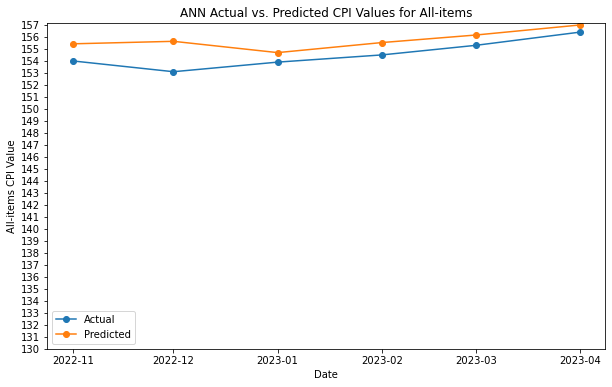

In [18]:
# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], test_data['All-items'].values[1:], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions_denormalized, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('ANN Actual vs. Predicted CPI Values for All-items')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))

plt.show()

## Convolutional LSTM

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )

# Prepare data for only "All-items" column
all_items_data = data[['All-items']]

# Define the train-test split
train_data = all_items_data[:-6]
test_data = all_items_data[-7:]

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the time steps for ConvLSTM
time_steps = 1

# Reshape the training and testing data for ConvLSTM
X_train = X_train.reshape(-1, time_steps, 1, 1, 1)
X_test = X_test.reshape(-1, time_steps, 1, 1, 1)

# Build the ConvLSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.ConvLSTM2D(180, kernel_size=(1, 1), activation='sigmoid', input_shape=(time_steps, 1, 1, 1)),
    tf.keras.layers.Dense(1)  # Output layer with a single output value
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Perform predictions
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions.reshape(-1, 1))



Epoch 1/500
119/119 [==============================] - 2s 2ms/step - loss: 0.1280
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 9/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 10/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 11/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 12/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 13/500


119/119 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 100/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 101/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 102/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 103/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 104/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 105/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 106/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 107/500
119/119 [==============================] - 0s 4ms/step - loss: 0.0444
Epoch 108/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 109/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 110/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0446
Epoch 

119/119 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 197/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 198/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 199/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 200/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 201/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 202/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 203/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 204/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 205/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 206/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 207/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 

119/119 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 294/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 295/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 296/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 297/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 298/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 299/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 300/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 301/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 302/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 303/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 304/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 

119/119 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 391/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 392/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 393/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 394/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 395/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 396/500
119/119 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 397/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 398/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 399/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0445
Epoch 400/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 401/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 

119/119 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 488/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 489/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 490/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 491/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 492/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 493/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 494/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 495/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 496/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 497/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 498/500
119/119 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 

In [ ]:
# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], test_data['All-items'].values[1:], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions_denormalized, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('ConvLSTM Actual vs. Predicted CPI Values for All-items')
plt.yticks(np.arange(130, np.ceil(np.max(test_values))+1, 1))
plt.show()
